# Word clouds

https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

In [1]:
import pandas as pd
import numpy as np
from tqdm import trange
from PIL import Image
import io
import math

import sys
import glob
import os

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import multidict as multidict
import re

In [3]:
def headlines(search_directories = [''], filename_filter = "*"):

    # Get a list of matching files
    files = []

    for i in range(len(search_directories)):
        files.append(sorted(glob.glob(os.path.join(search_directories[i], filename_filter))))

    files = [item for items in files for item in items] # shorthand to flatten the list of lists

    # Read in files and concatenate
    data = []

    for i in trange(len(files)):
        new_frame = pd.read_csv(files[i], header=0, parse_dates=['publishedAt'])
        data.append(new_frame)

    return pd.concat(data, sort=False)

In [4]:
!ls ../datastore/processed

abc-news	  cnn	    msnbc     reuters		  the-washington-post
associated-press  fox-news  nbc-news  the-new-york-times


In [5]:
def title_wordcloud(df, title=""):
    
    text = df['title'].str.cat(sep=' ')

    stopwords = WordCloud().stopwords.copy()
    other_stop_words = ["US", "say", "says","said", "new", "amid", "former", "will"]
    for word in other_stop_words:
        stopwords.add(word)
    
    mask = np.ones((400, 400), dtype=np.int8)
    wc = WordCloud(background_color="white", max_words=1000, mask=mask, collocations=False, stopwords=stopwords)
    
    # generate word cloud
    wc.generate_from_text(text)

    # Figure
    
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_axes([0,0,1,1])
    ax.imshow(wc, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(title, fontsize=24, fontweight="bold", pad=10)
    
    ## save figure
    buf = io.BytesIO()
    
    fig.savefig(
        buf,
        format='png',
        bbox_inches='tight',
        pad_inches=0.0
    )
    
    plt.close(fig)
    
    return Image.open(buf)

In [6]:
def concat_images(images, columns=2, padding=20, outname="concatted.png"):
    
    n_images = len(images)
    
    image_width, image_height = images[0].size # assumes all have the same size

    x_padding = padding
    y_padding = padding

    rows = math.ceil(n_images/columns)

    total_width = columns * image_width + (columns + 1) * padding
    total_height = rows * image_height + (rows + 1) * padding

    concat_im = Image.new('RGB', (total_width,total_height), color=(256, 256, 256))

    x_offset = x_padding
    y_offset = y_padding

    for i in range(n_images):

        # use the modulo to start or restart the row
        if i % columns == 0:
            x_offset = 0 + x_padding

        # use floor division to get the offset
        y_offset = (i // columns) * (image_height + y_padding) + y_padding

        concat_im.paste(images[i], (x_offset, y_offset))

        x_offset = x_offset + image_width + x_padding

#    concat_im.save(outname)
    
    return concat_im

In [7]:
abc = headlines(['../datastore/processed/abc-news/'], '*-2020-08-*')
fox = headlines(['../datastore/processed/fox-news/'], '*-2020-08-*')
wapo = headlines(['../datastore/processed/the-washington-post/'], '*-2020-08-*')
nbc = headlines(['../datastore/processed/nbc-news/'], '*-2020-08-*')
msnbc = headlines(['../datastore/processed/msnbc/'], '*-2020-08-*')
cnn = headlines(['../datastore/processed/cnn/'], '*-2020-08-*')
ap = headlines(['../datastore/processed/associated-press/'], '*-2020-08-*')
nyt = headlines(['../datastore/processed/the-new-york-times/'], '*-2020-08-*')

abc_wc = title_wordcloud(abc, title="ABC News")
fox_wc = title_wordcloud(fox, title="Fox News")
wapo_wc = title_wordcloud(wapo, title="The Washington Post")
nbc_wc = title_wordcloud(nbc, title="NBC News")
msnbc_wc = title_wordcloud(msnbc, title="MSNBC")
cnn_wc = title_wordcloud(cnn, title="CNN")
ap_wc = title_wordcloud(ap, title="Associated Press")
nyt_wc = title_wordcloud(nyt, title="The New York Times")

100%|██████████| 30/30 [00:00<00:00, 204.39it/s]


In [8]:
all = concat_images([ msnbc_wc, cnn_wc, wapo_wc,nyt_wc, abc_wc,  nbc_wc, ap_wc, fox_wc])

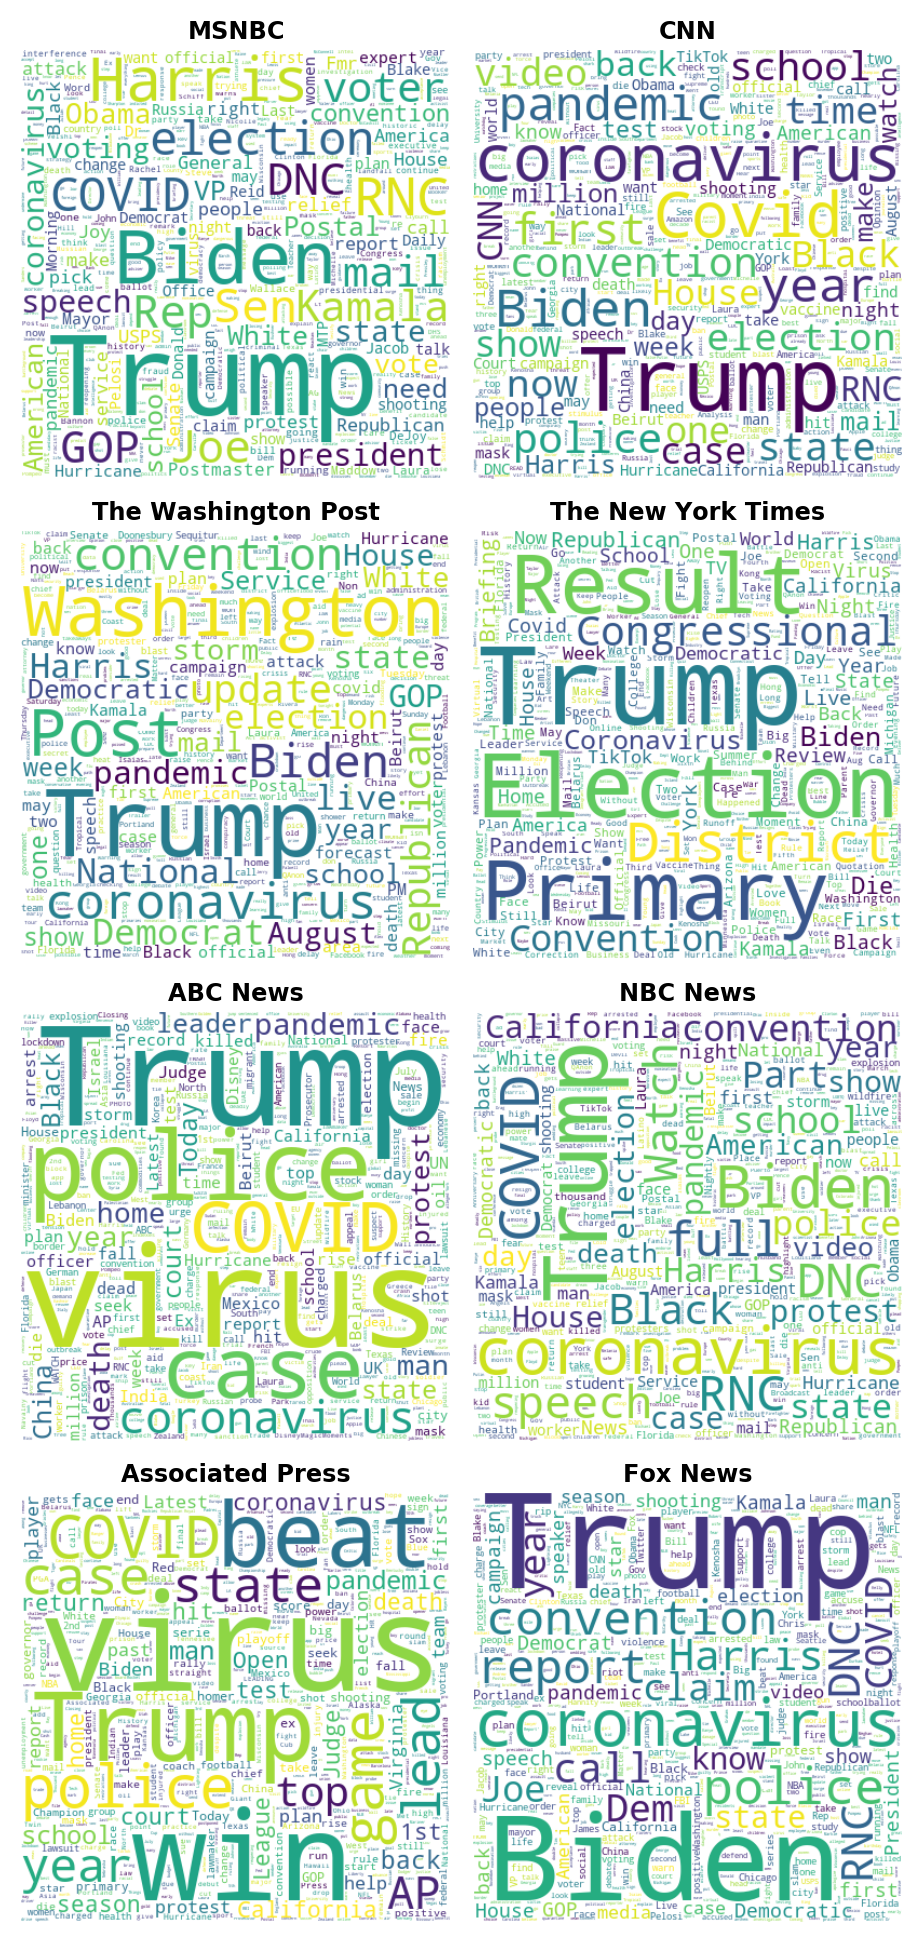

In [9]:
all

# Find frequencies

In [10]:
abc.head()

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,NaN,Supreme Court allows border wall construction ...,The Supreme Court ruled 5-4 along party lines.,https://abcnews.go.com/Politics/supreme-court-...,https://s.abcnews.com/images/US/border-wall-bu...,2020-08-01 01:54:57+00:00,The Supreme Court on Friday denied a request f...,abc-news,ABC News
1,NaN,Airbnb shutters party houses in NJ amid COVID-...,Airbnb says it’s cracking down on party houses...,https://abcnews.go.com/Business/wireStory/airb...,https://s.abcnews.com/images/Business/WireAP_5...,2020-08-01 01:40:19+00:00,"TRENTON, N.J. -- \r\nAirbnb said Friday it's c...",abc-news,ABC News
2,NaN,"Midair collision kills state legislator, 6 oth...","Seven people, including an Alaska state lawmak...",https://abcnews.go.com/US/wireStory/midair-col...,https://s.abcnews.com/images/US/WireAP_f71e9ce...,2020-08-01 00:44:17+00:00,"ANCHORAGE, Alaska -- \r\nSeven people, includi...",abc-news,ABC News
3,NaN,Supreme Court won't halt challenged border wal...,The Supreme Court has declined by a 5-4 vote t...,https://abcnews.go.com/Politics/wireStory/supr...,https://s.abcnews.com/images/US/border-wall-bu...,2020-08-01 00:27:23+00:00,WASHINGTON -- \r\nThe Supreme Court declined b...,abc-news,ABC News
4,NaN,"Boy, 9, fatally shot while playing at Chicago ...",Police say a 9-year-old boy was killed when a ...,https://abcnews.go.com/US/wireStory/boy-fatall...,NaN,2020-08-01 03:30:32+00:00,CHICAGO -- \r\nA 9-year-old boy was killed Fri...,abc-news,ABC News


In [11]:
text = abc['title'].str.cat(sep=' ')

stopwords = WordCloud().stopwords.copy()
other_stop_words = ["US", "say", "says","said", "new", "amid", "former", "will"]
for word in other_stop_words:
    stopwords.add(word)
    
wc = WordCloud(background_color="white", max_words=1000, collocations=False, stopwords=stopwords)

In [12]:
theset = wc.process_text(text)
df = pd.DataFrame.from_dict(theset, orient='index', columns=['count'])

df = df.sort_values('count', ascending=False)

In [13]:
df.head(10)

,count
virus,254
Trump,251
police,212
case,158
COVID,146
coronavirus,129
pandemic,126
death,124
man,117
year,105


OK, well this is kind of interesting, to see the top words over a specific time period. But what I'd probably like to do is give a specific word, and find how many times it's been used, over time. An app would allow you to select a time period, and see all the headlines that contained that word.

1. Generate a combined DB with the headlines, source, and date
2. Function to
    1. take input selection text
    2. find all rows with a title that contains the selection
    3. groupby on date and get count per source / or percent/source, etc.

In [42]:
data = headlines(['../datastore/processed/*/'], '*-2020-*-*')

100%|██████████| 1715/1715 [00:06<00:00, 245.92it/s]


In [43]:
data = data.set_index('publishedAt', drop=True)

In [62]:
def ngram(data, includes=None, excludes=None, sources=None, frequency="D"):
    
    if includes is not None:
        for include_word in includes:
                data = data[data["title"].str.contains(include_word, case=False, na=False)]

    if excludes is not None:
        for exclude_word in excludes:
            data = data[~data["title"].str.contains(exclude_word, case=False, na=False)]
    
    sub_group = data.groupby(by="source.id")
    
    if len(sub_group) == 0:
        print("No results from any source.")
        return

    fig = plt.figure(figsize=(18,4))
    ax = fig.add_axes([0,0,1,1])
    ax.set_title(f"Results for \"{text}\"")

    if not sources:
        sources = sub_group.groups
        
    for group in sources:
        
        try:
            group_results = sub_group.get_group(group)
        except:
            print(f"No results from {group}")
            return
        
        group_results.resample(frequency).count()['title'].plot(ax=ax, legend=True, label=group)
        
    plt.show()
    
    return sub_group

In [63]:
harris = ngram("Harris")

AttributeError: 'str' object has no attribute 'groupby'

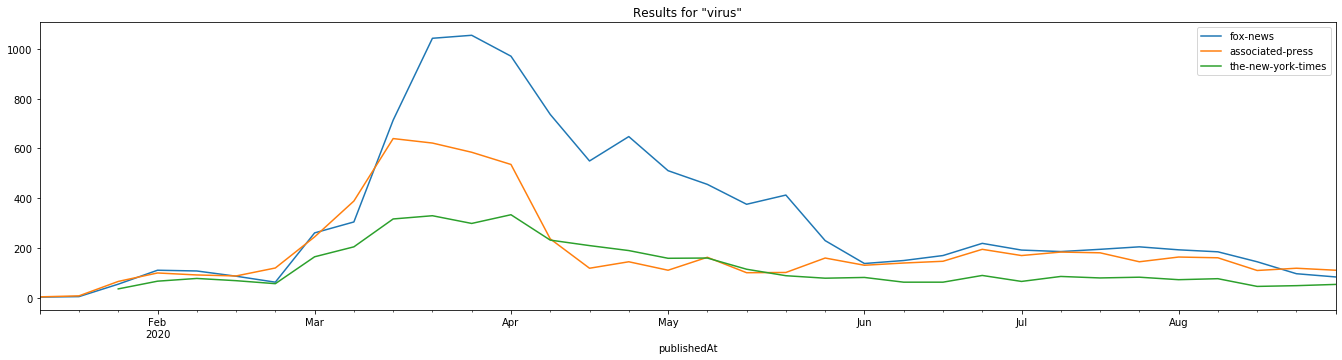

In [29]:
virus = ngram("virus", sources=['fox-news','associated-press', 'the-new-york-times'], frequency="W")

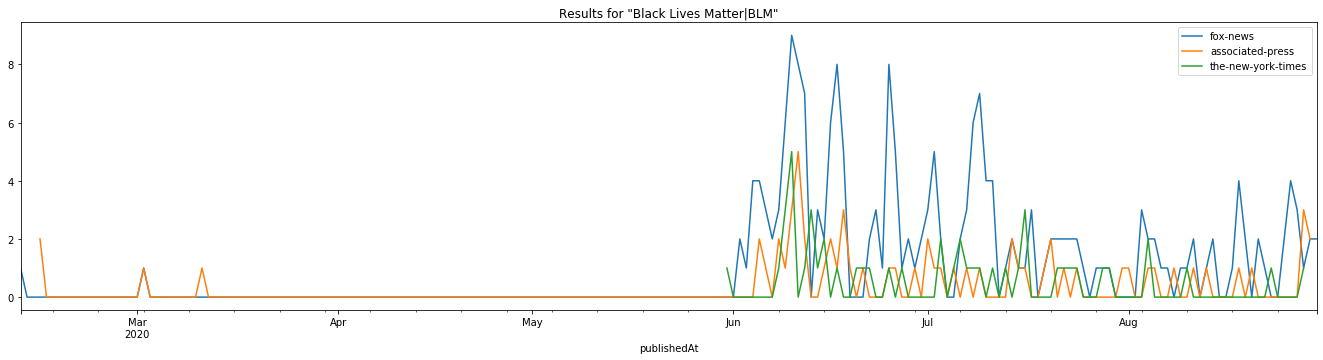

In [20]:
ngram("Black Lives Matter|BLM", sources=['fox-news','associated-press', 'the-new-york-times'])

Or do I want to know something like:
- date of first coverage
- how many articles covered that topic (per source)
- if a source never covered that topic